<h1> <center> GEOG 172: INTERMEDIATE GEOGRAPHICAL ANALYSIS </h1>
    <h2> <center> Evgeny Noi </h2>
        <h3> <center> Lecture 9: Correlations and Autocorrelations </h3>

# Review 

* Hypothesis tests (Null, Alternative, p-value) 
* Checking normality
* Comparing means
    * one sample (arbitrary aka assumed mean value) 
    * two samples (compare mean between the samples / groups) 
    * more than two samples (ANOVA) 

# Correlation 

* Visual Understanding of Correlation 
* Mathematical Understanding of Correlation 
* Statistical Modeling 

# Correlations = Linear Relationships in Data

* Linear function $y = mx + b$, where $m$ is the slope and $b$ is the $y$-intercept
* Given two points $(x_1, x_2)$ and $(y_1, y_2)$ we can calculate teh slope $\frac{y_2-y_1}{x_2 - x_1}$
* The slope describes the relationship between the variables 
    * positive slope (positive linear relationship: increase in X is associated with increase in Y) 
    * negative slope (negative linear relationship: increase in X is associated with decrease in Y) 
    * slope of 0 or near 0 (no linear relationship)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm

penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


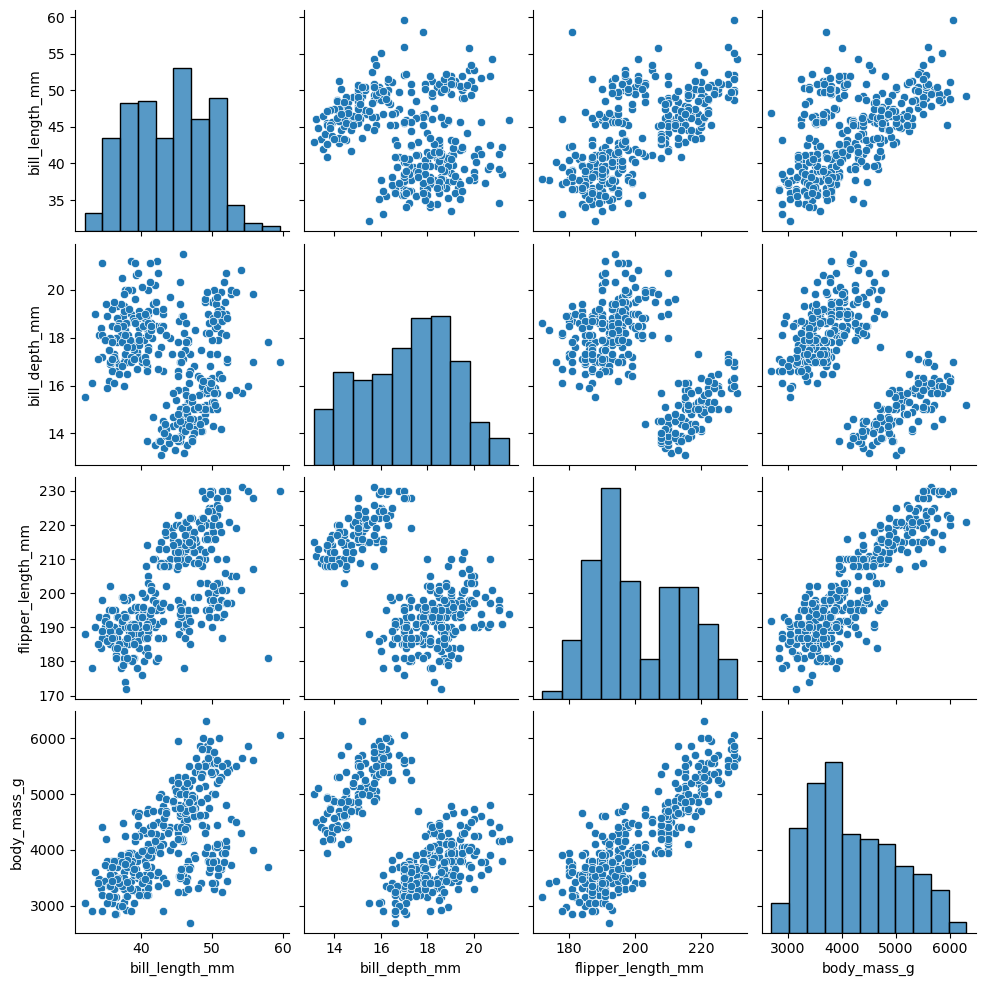

In [2]:
sns.pairplot(penguins)

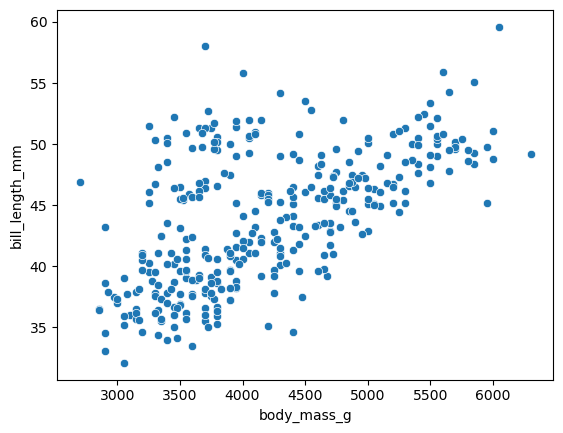

In [3]:
sns.scatterplot(x='body_mass_g', y='bill_length_mm', data=penguins);

<AxesSubplot:xlabel='body_mass_g', ylabel='bill_length_mm'>

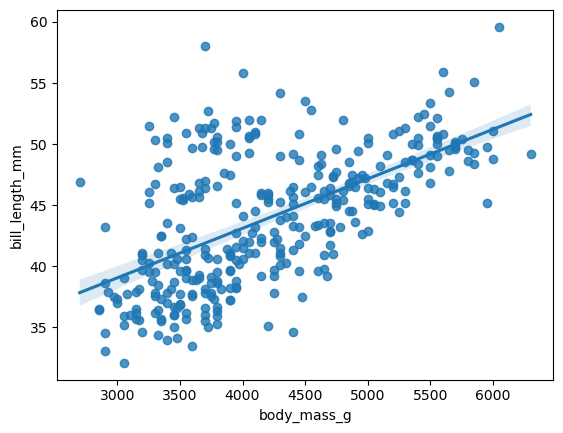

In [4]:
sns.regplot(x='body_mass_g', y='bill_length_mm', data=penguins, fit_reg=True)

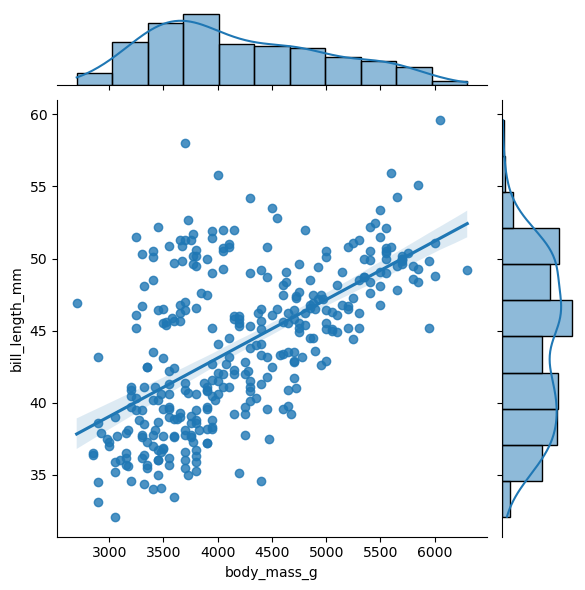

In [5]:
sns.jointplot(x='body_mass_g', y='bill_length_mm', kind='reg', data=penguins)

# Mathematical Formulation of Correlation

* Pearson's $r$ - sample and $\rho$ for population. 

$$
r=\dfrac{\sum (x_i-\bar{x})(y_i-\bar{y}) }{\sqrt{\sum (x_i-\bar{x})^2}\sqrt{\sum (y_i-\bar{y})^2}}=\frac{cov(x,y)}{\sigma_x \sigma_y}
$$

# Statistical Properties of the correlation coefficient (Pearson)

* $ -1 \leq r \leq 1$ 
* The sign of the correlation provides a direction of **linear** relationship
* 0 - means no relationship
* There are no units associated with $r$ 
* The close it is to $\pm 1$ the stronger the linear relationship
* If we fit a simple linear regression model between $Y$ and $X$, then $r$ has the same sign as $\beta_1$ (coefficient of $X$ in regression equation) 
* correlation value is the same regardless of what we define as $X$ and $Y$.

<img src="https://cdn1.byjus.com/wp-content/uploads/2021/03/covariance-3.png">

# Statistical Properties of the correlation coefficient (Pearson)

* $H_0$: $\rho_p = 0$ versus $H_a$: $\rho_p \neq 0$
* The sampling distribution for Pearson's $r_p$ is not normal. In order to attain confidence limits for $r_p$ based on a standard normal distribution, we transform $r_p$ using Fisher's Z transformation to get a quantity, $z_p$, that has an approximate normal distribution. See formulas [here](https://online.stat.psu.edu/stat509/lesson/18/18.1)

# Spearman Correlation

* Spearman rank correlation coefficient, $r_s$, is a non-parameteric measure of correlation based on data ranks. First, two variable values are ranked. Then, Pearson's $r_p$ is calculated on the ranks. 
* Spearman rank correlation coefficient quantifies the degree of linear association between the ranks of $X$ and the ranks of $Y$
* Also, $r_s$ does not estimate a natural population parameter (unlike Pearson's which estimates $\rho_p$).
* An advantage of the Spearman rank correlation coefficient is that the $X$ and $Y$ values can be continuous or ordinal, and approximate normal distributions for $X$ and $Y$ are not required.

In [6]:
import pingouin as pg

pg.corr(penguins.body_mass_g, penguins.bill_length_mm).round(2)

ModuleNotFoundError: No module named 'pingouin'

In [7]:
# pairwise correlation
pg.pairwise_corr(penguins)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,bill_length_mm,bill_depth_mm,pearson,two-sided,342,-0.235053,"[-0.33, -0.13]",1.119662e-05,1005.717,0.99298
1,bill_length_mm,flipper_length_mm,pearson,two-sided,342,0.656181,"[0.59, 0.71]",1.743974e-43,1.46e+40,1.00000
2,bill_length_mm,body_mass_g,pearson,two-sided,342,0.595110,"[0.52, 0.66]",3.808283e-34,8.34e+30,1.00000
3,bill_depth_mm,flipper_length_mm,pearson,two-sided,342,-0.583851,"[-0.65, -0.51]",1.232734e-32,2.679e+29,1.00000
4,bill_depth_mm,body_mass_g,pearson,two-sided,342,-0.471916,"[-0.55, -0.39]",2.276941e-20,2.103e+17,1.00000
5,flipper_length_mm,body_mass_g,pearson,two-sided,342,0.871202,"[0.84, 0.89]",4.370681e-107,1.87e+103,1.00000


<AxesSubplot:>

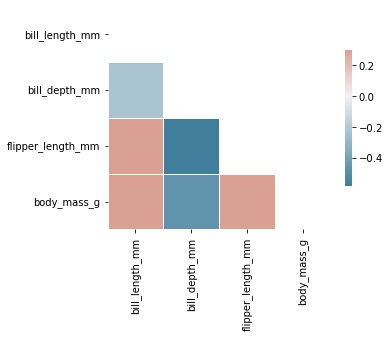

In [8]:
import numpy as np
corr = penguins.corr() # calculate pairwise correlations
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Statistical Modeling and Correlations 

* Oftentimes our data has many variables (100s, 1000s)
* If we know which of our variables are INDEPENDENT VARIABLES (predictors) and DEPENDENT VARIABLES (outcome), we can use pairwise correlations to limit the number of predictors without sacrificing much of the predictive power
    * in Statistics: use Accam's razor principle - the simplest model is preferred to the complex one (provided similar accuracy)
    * easier to interpret

# Misusing Correlations 

* The correlation methods discussed in this chapter should be used only with independent data; they should not be applied to repeated measures data where the data are not independent. For example, it would not be appropriate to use these measures of correlation to describe the relationship between Week 4 and Week 8 blood pressures in the same patients.
* Caution should be used in interpreting results of correlation analysis when large numbers of variables have been examined, resulting in a large number of correlation coefficients.
* The correlation of two variables that both have been recorded repeatedly over time can be misleading and spurious. Time trends should be removed from such data before attempting to measure correlation.
* To extend correlation results to a given population, the subjects under study must form a representative (i.e., random) sample from that population. The Pearson correlation coefficient can be very sensitive to outlying observations and all correlation coefficients are susceptible to sample selection biases.

# Misusing Correlations 2

* Care should be taken when attempting to correlate two variables where one is a part and one represents the total. For example, we would expect to find a positive correlation between height at age ten and adult height because the second quantity "contains" the first quantity.
* Correlation should not be used to study the relation between an initial measurement, X, and the change in that measurement over time, Y - X. X will be correlated with Y - X due to the regression to the mean phenomenon.
* Small correlation values do not necessarily indicate that two variables are unassociated. For example, Pearson's $r_p$  will underestimate the association between two variables that show a quadratic relationship. Scatterplots should always be examined.

# Misusing Correlations 3

* Correlation does not imply causation. If a strong correlation is observed between two variables A and B, there are several possible explanations:
    * A influences B
    * B influences A
    * A and B are influenced by one or more additional variables 
    * The relationship observed between A and B was a chance error.
* "Regular" correlation coefficients are often published when the researcher really intends to compare two methods of measuring the same quantity with respect to their agreement. This is a misguided analysis because correlation measures only the degree of association; it does not measure agreement (Use Kohen's Kappa for that). 

# Connection between correlation and regression 

* Correlation does not imply causation! Thus we can only state that there is positive/negative association between two variables. 
* Regression always comes with a strong believe about our understanding of direction of this association

$$
\text{home value} \sim \text{number of bedrooms} + \text{number of bethrooms} + \text{proximity to amenities}
$$

* Regression breaks down our data into **dependent** and **independent** variables (predictors). Regression breaks down the how much of the variance in the dependent variable is caused by the variation in the independent variables (more on this later in the course). 

# Regression 

* Line fitting (optimizing the slope and intercept of the line so that the distances between the observed points and the line are minimized 

<img src="https://ethanweed.github.io/pythonbook/_images/05.04-regression_8_0.png">

<img src="https://ethanweed.github.io/pythonbook/_images/05.04-regression_12_0.png">

In [9]:
x = penguins.body_mass_g.dropna() # predictor
y = penguins.bill_length_mm.dropna() # predicted

reg1 = pg.linear_regression(x,y).round(4)
print(reg1.iloc[:,0:7])
print('R-squared is .35, meaning that body mass explains 35% of variability in bill length of a penguin')

         names     coef      se        T  pval      r2  adj_r2
0    Intercept  26.8989  1.2691  21.1944   0.0  0.3542  0.3523
1  body_mass_g   0.0041  0.0003  13.6544   0.0  0.3542  0.3523
R-squared is .35, meaning that body mass explains 35% of variability in bill length of a penguin


# Correlation and Regression

* Runnig a regression with one predictor is equivalent to running a correlation. In fact $r_p^2 = R^2$. Demonstrated on the next slide. 

In [10]:
r = x.corr(y)
print(f'correlation coef: {r**2}')
print(f'regression coef: {reg1.r2[0]}')

correlation coef: 0.354155703142187
regression coef: 0.3542


# Autocorrelation 

> Correlation with a lagged copy of self

# Autocorrelation

* Correlation works if we have two variables. These variables do not have any referencing (no temporal referencing no geo-referencing). **ORDER and ARRANGEMENT DO NOT MATTER**. 
* Autocorrelation - relationship to itself. Works on one referenced variable. 

# 1D Case: Temporal Autocorrelation

![](acf.png)

In [11]:
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



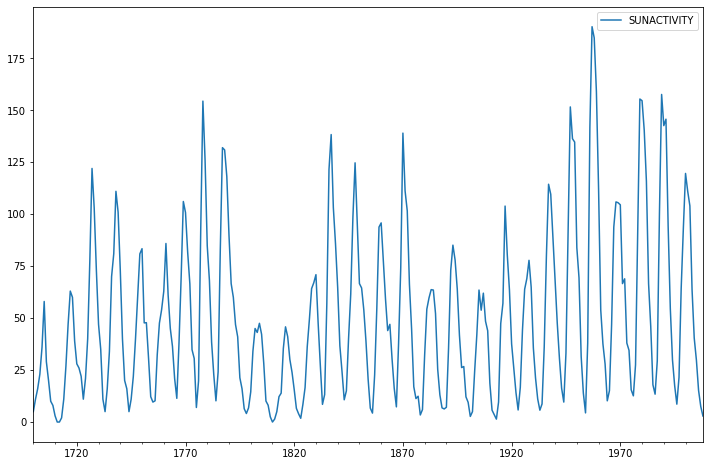

In [12]:
dta = sm.datasets.sunspots.load_pandas().data #sunspots per year
dta.index = pd.Index(sm.tsa.datetools.dates_from_range("1700", "2008"))
dta.index.freq = dta.index.inferred_freq
del dta["YEAR"]
dta.plot(figsize=(12, 8));

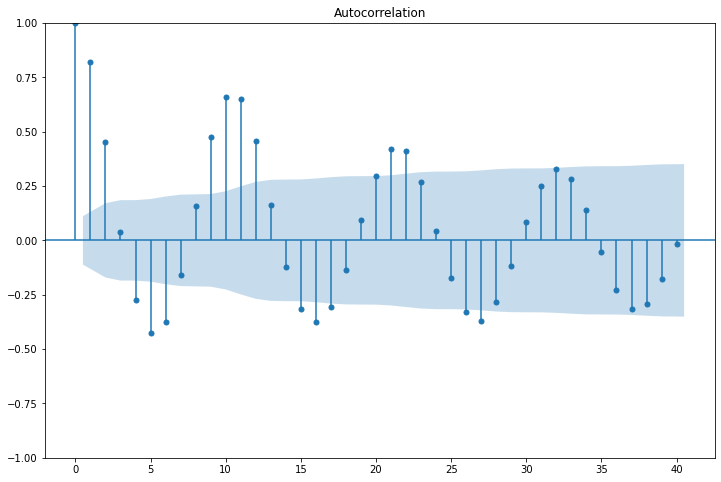

In [13]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)

# Global Spatial Autocorrelation 

### Recall Tobler's First Law of Geography

> Everything is related to everything else. But near things are more related than distant things. (Tobler, 1969)

#### We are going to give a numerical quantification of TFL in the following slides

# What is Spatial Autocorrelation 

* it the absence of SA we observe complete spatial randomness (CSR):  a situation in which the location of an observation gives no information whatsoever about its value. No discernible spatial pattern is observed. 
* Positive SA: similar values are located next to one another: HH and LL. Closeness + Stat similarity! Examples: income, poverty. 
* Negative SA: similar values are located away from one another. Distance + Sta similarity! Examples: grocery stores, schools. 
* The tools quantifying SA are typically gathered under the umbrella of exploratory spatial data analysis (ESDA) in geography

In [14]:
from libpysal.examples import load_example
import geopandas as gpd
guerry_loc = load_example('Guerry')
guerry = gpd.read_file(guerry_loc.get_path('guerry.geojson'))
print(guerry.shape)
guerry.head()

Example not available: Guerry
Example not downloaded: Chicago parcels
Example not downloaded: Chile Migration
Example not downloaded: Spirals
(85, 24)


,dept,Region,Dprtmnt,Crm_prs,Crm_prp,Litercy,Donatns,Infants,Suicids,MainCty,...,Infntcd,Dntn_cl,Lottery,Desertn,Instrct,Prsttts,Distanc,Area,Pop1831,geometry
0,1,E,Ain,28870,15890,37,5098,33120,35039,2,...,60,69,41,55,46,13,218.372,5762,346.03,"MULTIPOLYGON (((801150.00000 2092615.00000, 80..."
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2,...,82,36,38,82,24,327,65.945,7369,513.00,"MULTIPOLYGON (((729326.00000 2521619.00000, 72..."
2,3,C,Allier,26747,7925,13,10973,17044,114121,2,...,42,76,66,16,85,34,161.927,7340,298.26,"MULTIPOLYGON (((710830.00000 2137350.00000, 71..."
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1,...,12,37,80,32,29,2,351.399,6925,155.90,"MULTIPOLYGON (((882701.00000 1920024.00000, 88..."
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1,...,23,64,79,35,7,1,320.280,5549,129.10,"MULTIPOLYGON (((886504.00000 1922890.00000, 88..."


# André-Michel Guerry, 1802–1866

|||
|---|---|
|<img src="https://www.researchgate.net/profile/Michael-Friendly/publication/244957809/figure/fig1/AS:298483740364806@1448175477516/Guerry-and-Balbi-s-1829-Statistique-Comparee-de-l-Etat-de-lInstruction-et-du_Q320.jpg">|<h3>French lawyer and amateur statistician, who, together with Adolphe Quetelet, is considered a founder of moral statistics, which led to the development criminology and sociology</h3> <h5> Read more [here](https://www.datavis.ca/papers/guerry-STS241.pdf)</h5>|

# First Look at Spatial Autocorrelation - Choropleth Mapping

1. Can you discern patterns on the map? 
2. The shape and size of geometries can also significantly distort our perception of the underlying pattern!

In [15]:
# re-creating the three maps from original publication
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,5))
guerry.plot(ax=ax1, aspect=1, fc='None', ec='k')
guerry.plot(ax=ax2, aspect=1, fc='None', ec='k')
guerry.plot(ax=ax3, aspect=1, fc='None', ec='k')
guerry.plot(column='Crm_prs', cmap='Greys', scheme='quantiles', k=5, ax=ax1, aspect=1,  
            legend=True, legend_kwds={'loc': 'center', 'bbox_to_anchor':(0.5, -0.3)})
guerry.plot(column='Crm_prp', cmap='Greys', scheme='quantiles', k=5, ax=ax2, aspect=1,  
            legend=True, legend_kwds={'loc': 'center', 'bbox_to_anchor':(0.5, -0.3)})
guerry.plot(column='Instrct', cmap='Greys', scheme='quantiles', k=5, ax=ax3, aspect=1,  
            legend=True, legend_kwds={'loc': 'center', 'bbox_to_anchor':(0.5, -0.3)})
ax1.set_title('Crimes Against Persons', fontsize=16); 
ax2.set_title('Crimes Against Property', fontsize=16); 
ax3.set_title('Instruction', fontsize=16); 
ax1.axis('off');
ax2.axis('off');
ax3.axis('off');
fig.savefig('guerry.png')
plt.close()

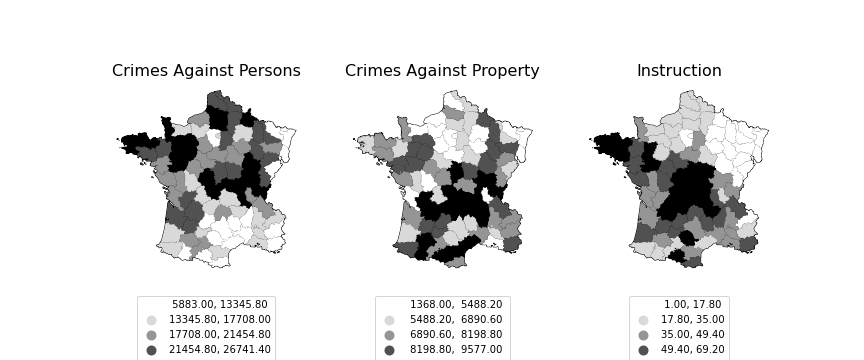

In [16]:
from IPython.display import Image
Image(filename='guerry.png') 

# Spatial Lag

* the spatial lag captures the behavior of a variable in the immediate surroundings of each location (local smoother) 

$$
Y_{sl} = WY
$$

$$
y_{sl - i} = \sum_{j}w_{ij}y_j
$$

* $W$ is typically row-standardized, bounded between 0 and 1. In other words, the spatial lag is *local mean*. 

# Moran's $I$

$$
I = \dfrac{n}{\sum_i\sum_j w_{ij}} \dfrac{\sum_i\sum_j w_{ij} \, z_i \, z_j}{\sum_i z_i^2}
$$

where $n$ is the number of observations, $z_i$ is the standardized value of the variable of interest at location $i$, and $w_{ij}$ is the cell corresponding to the $i$-th row and $j$-th column of a $W$ spatial weights matrix.

In [17]:
from libpysal.weights.contiguity import Queen
import splot
from esda.moran import Moran

y = guerry['Crm_prp'].values
w = Queen.from_dataframe(guerry)
w.transform = 'r'

moran = Moran(y, w)
moran.I

0.26355334031776523

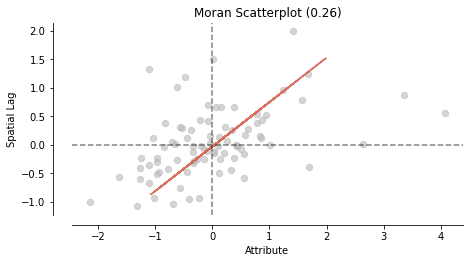

In [18]:
from splot.esda import moran_scatterplot

fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

# Interpreting Moran's Scatterplot 

* The plot displays a positive relationship between both variables. This indicates the presence of positive spatial autocorrelation: similar values tend to be located close to each other (HH and LL). 
* This, however, does not mean that this is the only case in the dataset: HL and LH are possible. But it means that, if we had to summarize the main pattern of the data in terms of how clustered similar values are, the best way would be to say they are positively correlated and, hence, **clustered** over space.
* In the context of an example the department with high concentrations of crimes against property tend to cluster together. 

# Permutation Inference 

* Inference for Moran’s I is based on a null hypothesis of complete spatial randomness. 
* The distribution of the statistic under the null can be derived using either an assumption of normality (independent normal random variates), or so-called randomization (i.e., each value is equally likely to occur at any location). 
* While the analytical derivations provide easy to interpret expressions for the mean and the variance of the statistic under the null hypothesis, inference based on them employs an approximation to a standard normal distribution, which may be inappropriate when the underlying assumptions are not satisfied
* An alternative to the analytical derivation is a computational approach based on permutation. This calculates a reference distribution for the statistic under the null hypothesis of spatial randomness by randomly permuting the observed values over the locations.

# Permutation Inference

* The statistic is computed for each of these randomly reshuffled data sets, which yields a reference distribution. This approach is not sensitive to potential violations of underlying assumptions, and is thus more robust, although limited in generality to the actual sample.
* The reference distribution is used to calculate a so-called pseudo p-value.
$$
p = \frac{R+1}{M+1}
$$
where $R$ is the number of times permuted statistic is more extreme than observed and $M$ is the number of simulations. 

>  A result that has a p-value of 0.01 with 99 permutations is not necessarily more significant than a result with a p-value of 0.001 with 999 permutations. (Source: https://geodacenter.github.io/workbook/5a_global_auto/lab5a.html)

C:\Users\noibar\anaconda3\envs\geo_env\lib\site-packages\splot\_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


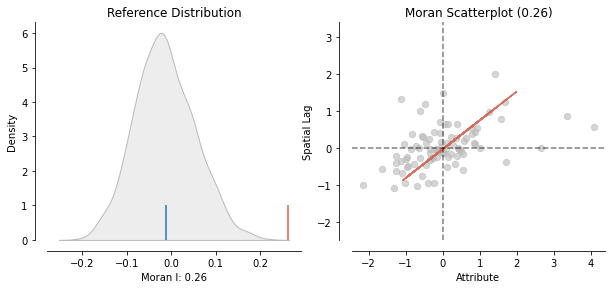

In [19]:
from splot.esda import plot_moran

plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()

In [20]:
p = moran.p_sim

print(f'Our simulated p-value for Moran`s I: {p}')

Our simulated p-value for Moran`s I: 0.001


# Questions? 